In [1]:
import csv

def crear_listas_por_columna(nombre_archivo):
    """
    Lee un archivo CSV y crea una lista para cada columna.

    Args:
        nombre_archivo (str): La ruta del archivo CSV.

    Returns:
        tuple: Una tupla que contiene:
            - dict: Un diccionario donde las claves son los nombres de las columnas
                    y los valores son listas con los datos de cada columna.
            - list: Una lista con los nombres de las columnas.
    """
    columnas_data = {}
    nombres_columnas = []

    try:
        with open(nombre_archivo, 'r', newline='', encoding='utf-8') as archivo_csv:
            lector_csv = csv.reader(archivo_csv)
            
            try:
                encabezado = next(lector_csv)
                nombres_columnas = encabezado
                
                # Inicializar el diccionario con los nombres de las columnas como claves
                for nombre in nombres_columnas:
                    columnas_data[nombre] = []
                    
            except StopIteration:
                print("El archivo CSV está vacío.")
                return {}, []

            # Llenar las listas con los datos de cada columna
            for fila in lector_csv:
                for i, nombre_columna in enumerate(nombres_columnas):
                    if i < len(fila):
                        columnas_data[nombre_columna].append(fila[i])
                    else:
                        columnas_data[nombre_columna].append('') 

    except FileNotFoundError:
        print(f"Error: El archivo '{nombre_archivo}' no se encontró.")
        return None, None
    except Exception as e:
        print(f"Ocurrió un error: {e}")
        return None, None

    return columnas_data, nombres_columnas

# --- Ejemplo de uso ---
if __name__ == '__main__':
    # Para este ejemplo, asegúrate de tener un archivo 'datos.csv'
    # o simplemente usa el nombre 'Teen Smartphone Usage and Addiction Impact Dataset.csv'
    # si ya existe.

    nombre_archivo_ejemplo = r'Teen Smartphone Usage and Addiction Impact Dataset.csv'
    
    # Intenta crear un archivo de ejemplo si no existe
    try:
        with open(nombre_archivo_ejemplo, 'x', newline='', encoding='utf-8') as f:
            writer = csv.writer(f)
            writer.writerow(['nombre', 'edad', 'ciudad'])
            writer.writerow(['Juan', '30', 'Madrid'])
            writer.writerow(['Maria', '25', 'Barcelona'])
            writer.writerow(['Pedro', '35', 'Valencia'])
            print(f"Se ha creado un archivo de ejemplo '{nombre_archivo_ejemplo}'.")
    except FileExistsError:
        pass

    diccionario_columnas, nombres_columnas = crear_listas_por_columna(nombre_archivo_ejemplo)

    if diccionario_columnas:
        print("Datos de las columnas:")
        for nombre in nombres_columnas:
            print(f"'{nombre}': {diccionario_columnas[nombre]}")

Datos de las columnas:
'ID': ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '123', '124', '125', '126', '127', '128', '129', '130', '131', '132', '133', '134', '135', '136', '137', '138', '139', '140', '141', '142', '143', '144', '145', '146', '147', '148', '149', '150', '151', '152', '153', '154', 

In [5]:
valores = list(diccionario_columnas.values())
longitud_anterior = None  # Inicializamos con None para la primera iteración
resultado = True  # Asumimos que todas tienen la misma longitud al principio

for valor_actual in valores:
  longitud_actual = len(valor_actual)
  
  if longitud_anterior is not None and longitud_actual != longitud_anterior:
    resultado = False
    print(f"Las longitudes de las listas son diferentes. La anterior era {longitud_anterior} y la actual es {longitud_actual}.")
    break  # Detenemos el bucle al encontrar la primera diferencia
  
  longitud_anterior = longitud_actual

if resultado:
  print("Todas las listas en el diccionario tienen la misma longitud.")

for i in range(len(list(diccionario_columnas.keys()))):
    print(f'{i} : {list(diccionario_columnas.keys())[i]}')

Todas las listas en el diccionario tienen la misma longitud.
0 : ID
1 : Name
2 : Age
3 : Gender
4 : Location
5 : School_Grade
6 : Daily_Usage_Hours
7 : Sleep_Hours
8 : Academic_Performance
9 : Social_Interactions
10 : Exercise_Hours
11 : Anxiety_Level
12 : Depression_Level
13 : Self_Esteem
14 : Parental_Control
15 : Screen_Time_Before_Bed
16 : Phone_Checks_Per_Day
17 : Apps_Used_Daily
18 : Time_on_Social_Media
19 : Time_on_Gaming
20 : Time_on_Education
21 : Phone_Usage_Purpose
22 : Family_Communication
23 : Weekend_Usage_Hours
24 : Addiction_Level


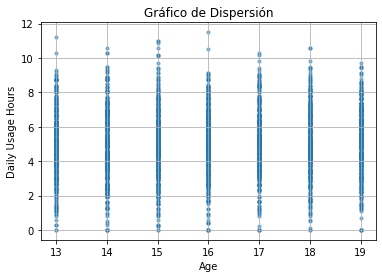

Age
13    4.917552
14    4.904215
15    4.987007
16    5.059957
17    5.033981
18    5.102689
19    5.142993
Name: Daily_Usage_Hours, dtype: float64


In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Age = list(diccionario_columnas.values())[2]
Daily_Usage_Hours = list(diccionario_columnas.values())[6]

Age = pd.to_numeric(Age, errors='coerce')
Daily_Usage_Hours = pd.to_numeric(Daily_Usage_Hours, errors='coerce')

# Crear el diagrama de dispersión
plt.scatter(Age, Daily_Usage_Hours, s=10, alpha=0.5)

# Personalizar el gráfico
plt.xlabel('Age')
plt.ylabel('Daily Usage Hours')
plt.title('Gráfico de Dispersión')
plt.grid(True)

# Mostrar el gráfico
plt.show()

# Asegurarse de que los datos estén en el formato correcto
Age = pd.to_numeric(Age, errors='coerce')
Daily_Usage_Hours = pd.to_numeric(Daily_Usage_Hours, errors='coerce')

# Crear un DataFrame temporal para la agrupación
df = pd.DataFrame({'Age': Age, 'Daily_Usage_Hours': Daily_Usage_Hours})

# Agrupar por 'Age' y calcular la media de 'Daily_Usage_Hours'
media_por_edad = df.groupby('Age')['Daily_Usage_Hours'].mean()

# Imprimir los resultados
print(media_por_edad)

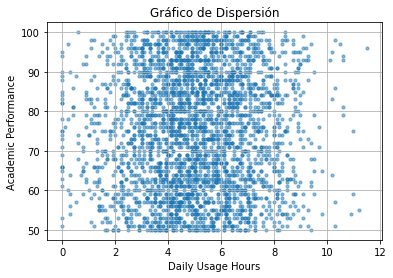

La media de horas de uso diario con el móvil es: 5.020666666666667
La media de rendimiento es: 74.94733333333333


In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Daily_Usage_Hours = list(diccionario_columnas.values())[6]
Academic_Performance = list(diccionario_columnas.values())[8]

Daily_Usage_Hours = pd.to_numeric(Daily_Usage_Hours, errors='coerce')
Academic_Performance = pd.to_numeric(Academic_Performance, errors='coerce')

# Crear el diagrama de dispersión
plt.scatter(Daily_Usage_Hours, Academic_Performance, s=10, alpha=0.5)

# Personalizar el gráfico
plt.xlabel('Daily Usage Hours')
plt.ylabel('Academic Performance')
plt.title('Gráfico de Dispersión')
plt.grid(True)

# Mostrar el gráfico
plt.show()


print(f'La media de horas de uso diario con el móvil es: {np.mean(Daily_Usage_Hours)}')
print(f'La media de rendimiento es: {np.mean(Academic_Performance)}')

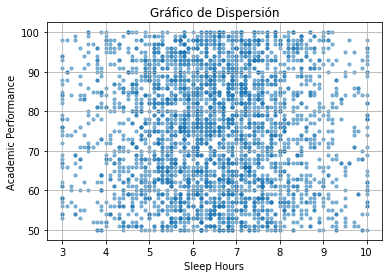

Academic_Performance_Interval  Sleep_Hours
                     [50, 55)     6.516842
                     [55, 60)     6.581470
                     [60, 65)     6.491246
                     [65, 70)     6.374828
                     [70, 75)     6.484328
                     [75, 80)     6.532903
                     [80, 85)     6.412583
                     [85, 90)     6.417608
                     [90, 95)     6.442254
                    [95, 100)     6.594558


In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


Sleep_Hours = list(diccionario_columnas.values())[7]
Academic_Performance = list(diccionario_columnas.values())[8]

Sleep_Hours = pd.to_numeric(Sleep_Hours, errors='coerce')
Academic_Performance = pd.to_numeric(Academic_Performance, errors='coerce')

# Crear el diagrama de dispersión
plt.scatter(Sleep_Hours, Academic_Performance, s=10, alpha=0.5)

# Personalizar el gráfico
plt.xlabel('Sleep Hours')
plt.ylabel('Academic Performance')
plt.title('Gráfico de Dispersión')
plt.grid(True)

# Mostrar el gráfico
plt.show()

Sleep_Hours = diccionario_columnas['Sleep_Hours']
Academic_Performance = diccionario_columnas['Academic_Performance']

Sleep_Hours = pd.to_numeric(Sleep_Hours, errors='coerce')
Academic_Performance = pd.to_numeric(Academic_Performance, errors='coerce')

# Crear un DataFrame con las dos columnas
df = pd.DataFrame({'Academic_Performance': Academic_Performance, 'Sleep_Hours': Sleep_Hours})

# Definir los intervalos de rendimiento académico
bins = np.arange(0, df['Academic_Performance'].max() + 5, 5)

# Crear una nueva columna con los intervalos
df['Academic_Performance_Interval'] = pd.cut(df['Academic_Performance'], bins=bins, right=False)

# Agrupar por los intervalos y calcular la media de horas de sueño
media_sueno_por_intervalo = df.groupby('Academic_Performance_Interval')['Sleep_Hours'].mean().reset_index()

# Filtrar solo las filas que tienen un valor numérico (no NaN) en 'Media de Horas de Sueño'
media_sueno_filtrada = media_sueno_por_intervalo.dropna()

# Imprimir la tabla resultante sin el índice
print(media_sueno_filtrada.to_string(index=False))